## MENTAL MODEL OF WEB - SCRAPPING
***

Typical flow of any web scrapping application (Script)
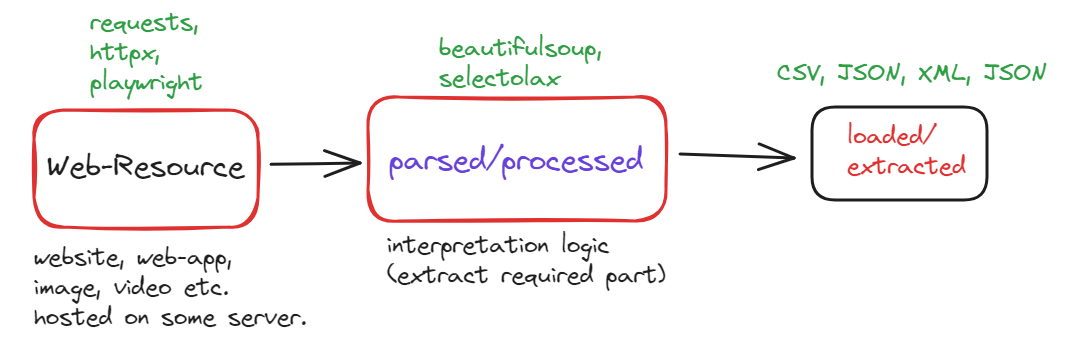

Note: **Playwright** - Headless Browser 

## HTTP
***
**HTTP - Hyper Text Transer Protocol**\
A comunication protocol that allows exhange of information between a client and a server.

HyperText : Text with links 

### Properties of HTTP 

**1. Request & Response**\
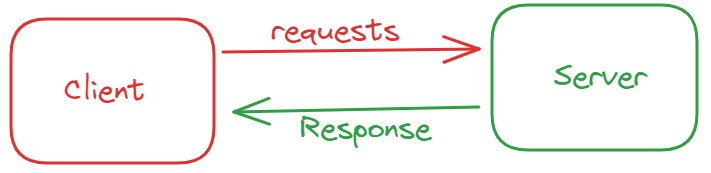\
Client initiates a request and a server responds to it.\
\
**2. Human Readable**
- HTTP is text-based.
- Easy to troubleshoot.

**3. Naturally extensible**
-   New functinality can be added using headers.etc as long as client agrees with the server.

Note: 
- Let say we send a GET request "www.google.com" the server will respond back with some text which will be rendered in our browser that's the google homepage.
- What the client sends is called request and what server sends back is called response each request-response cycle is stateless meaning a given request in HTTP by default independent of any other request. 

### STATE
***
    State
[ The condition of a system at a given time = History + Current input ]\

<p>We know that each HTTP request is stateless but then how does the server remembers the client?
(Like items added to a cart and move to other page etc.). Basicaly a websites remembers us when we browse from one page to another. How is this possible?</p>

When we browse from one page to the next we are not actually browsing from one resource to next without any context, in context of client server relation state is/or could be the information stored on the server which is associated with a given client, and this state is what allows a server to remember the client i.e browser cookie (geneated by the server and stored on client browser/user agent). 

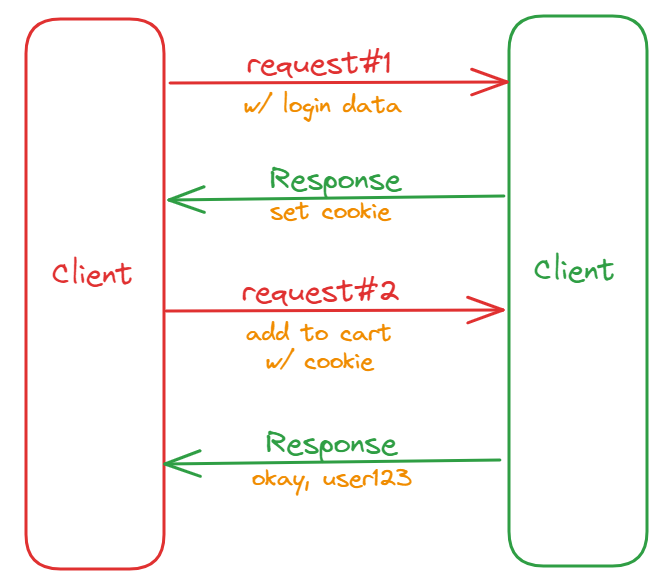

- User logs in with his username and password.
- Server then authenticats the user, generates a cookie and pass it back (has expiry date). This cookie uniquely identifies the client.
- Let's say **Request#2** is what only authenticated users can make then clients needs to pass that cookie to make that request.
  

### USER-AGENT
***
Software used to access a web resource on behalf of user (that why called agent) 
- Web browser 
- Crawler 
- Bot
- Python script (frame-work) etc. 

### HTTP Verbs
*** 
Type of action the client wants to perform ( Total ~ 39 Verbs)
- **GET:** Used to retrive a resource from the web. (Webpages, images, etc.) 
- **POST:** Create a new resource on the server. (Creating new account)
- **PUT:** Update resources in server (Example: User updating profile)
- **PATCH:** Update resource (but typically only partially)
- **DELETE:** Delete a resource on the server.

### STATUS CODE
***


Note: A client can send any request to a server, which server is obivously not obligated to honour and Whether the server respected the request is communicated via status code. 

Status code: Three digit number send back to the client, for each response.

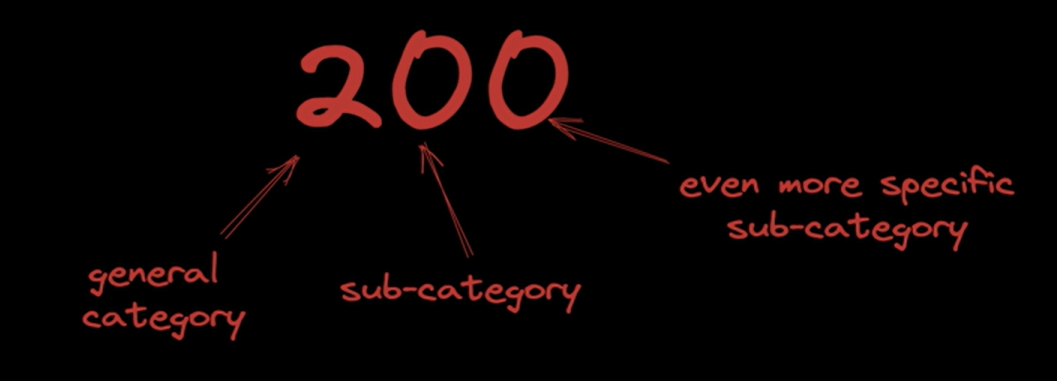

HTTPs status class 

- 100s Informational : Meant to provide additional information to the client about the request.
    - Ex: Switching Protocols

- 200s Success: Status response
    - 201 Created. 
    - 204 No content. 

- 300s Redirections 
    - 301 Moved permanently. 
    - 307 Temporary redirect.

- 400s Client Errors 
    - 404 Not found. 
    - 403 Forbidden.
    - 405 Method not allowed.

- 500s Server errors 
    - 500 Internal server error.
    - 502 Bad gateway. 



### HEADERS
*** 

HTTP is extensive (i.e the protocol allows the additon of other information to the request and response messages)\
Example:- using headers\
\
Headers play important role in identifying user-agent and discriminating against unwanted agents (ex: Web - scrappers) and favoring wanted agents.

Information : Google Crawler Bot

- Indexes websites to picked up in the google search. 
- Also useful for websites since it drives lot of traffic. 
( Google benifts from crawling the web and websites benefits by being crawled by the crawler)

Example: Financial Times - articles are behind the paywall which is accessible by the google crawler.

Use the below header:\
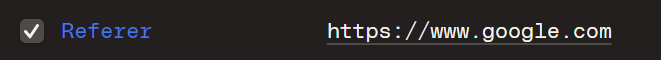



### Proxies
*** 